Ce travail est réalisé par : MOUSSAFIR Rachid et HOUMAIDI Omar

#                                                                                        Accord de crédit Risque liée au profil


## 1 - Introduction 

L’une des activités principales des établissements financiers est le crédit. Paradoxalement les banques ont de l'argent à prêter mais il est difficile d'emprunter. Parce que les banques sont exigeantes et sensibles à la qualité des dossiers qu'elles financent. Elles cherchent de bons dossiers c'est-à-dire des dossiers sans risque ou à risques parfaitement maîtrisés.

Quand une banque prête de l'argent elle assume un risque appelé risque de crédit. Le risque de crédit est le principal risque contenu dans le bilan d'une banque généraliste. En effet, il consomme en moyenne les ¾ des fonds propres réglementaires.

c’est dans ce cadre là que la société banque Chaabi nous a appelé afin de traiter les dossiers des clients afin de mettre en place une solution de Machine Learning qui va permettre d’analyser et de classer les profils des clients (client à risque élevé ou à faible risque) en fonction de leur dossier.

Nous commencerons donc par établir en première partie une description de la base de données des clients qui veulent acquérir un crédit auprès de notre banque.
Cela nous permettra d’établir une liste des variables qui pourraient nous aider à répondre au mieux à cette question.

En seconde partie, nous allons  traiter nos données en réalisant des statistiques descriptives afin d’avoir une vue sur la donnée et nous permettrons d’établir une liste des variables qui pourraient nous aider à répondre au mieux à la question.  

Nous pourrons alors aborder en troisième partie le vif du sujet et entraîner un modèle de Machine Learning qui va nous permettre de classer les clients en fonction de leur dossier.


## 2 - Description du jeu de données

La banque nous a confié un échantillon de leur base de données  sur lequel nous allons travailler, cet ensemble de données contient alors 1000 lignes où chaque ligne  définit un client qui est classé comme bon ou mauvais selon 20 attributs.


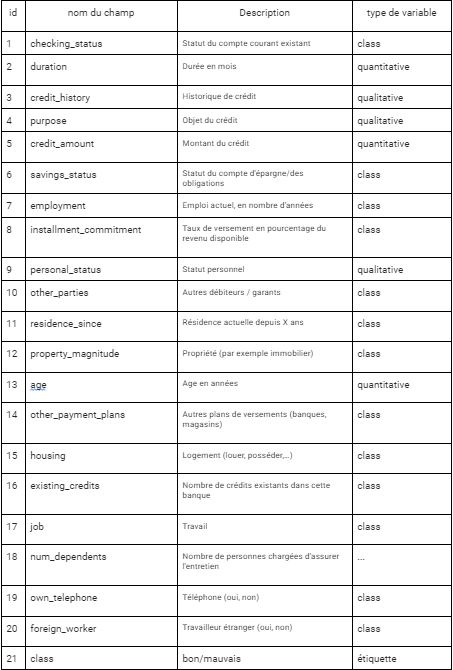

In [1]:
# description des variables
from IPython.display import Image,display
display(Image(filename="C:/Users/pc/Documents/M2 SIAD BI/S1/INFORMATIQUE/Machine Learning for analytics nadarajen verapeen_Me/Projet avec omar/rendu préliminaire_03_12_2021/Capture.jpg"))


## 3 - Statistiques descriptives

### 3 - 1 - Importation du fichier csv et statistiques de la base de données

In [2]:
# Importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# importer le fichier csv
base = pd.read_csv("C:/Users/pc/Downloads/credit-g_zip/data/credit-g_csv.csv", sep = ",")

In [4]:
print(base)

    checking_status  duration                  credit_history  \
0                <0         6  critical/other existing credit   
1          0<=X<200        48                   existing paid   
2       no checking        12  critical/other existing credit   
3                <0        42                   existing paid   
4                <0        24              delayed previously   
..              ...       ...                             ...   
995     no checking        12                   existing paid   
996              <0        30                   existing paid   
997     no checking        12                   existing paid   
998              <0        45                   existing paid   
999        0<=X<200        45  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv           1169  no known savings         >=7   
1               radio/tv           5951              <100      1<=X<4   


In [5]:
# affichage des 7 premieres lignes
base.head(n=7)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good


In [6]:
#Dimensions de la base
base.shape

(1000, 21)

In [7]:
# Description des variables quantitatives
base.describe().round(2)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.90,3271.26,2.97,2.84,35.55,1.41,1.16
std,12.06,2822.74,1.12,1.10,11.38,0.58,0.36
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00
25%,12.00,1365.50,2.00,2.00,27.00,1.00,1.00
50%,18.00,2319.50,3.00,3.00,33.00,1.00,1.00
75%,24.00,3972.25,4.00,4.00,42.00,2.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00


In [8]:
# Vérification des valeurs nulles
base.count()

checking_status           1000
duration                  1000
credit_history            1000
purpose                   1000
credit_amount             1000
savings_status            1000
employment                1000
installment_commitment    1000
personal_status           1000
other_parties             1000
residence_since           1000
property_magnitude        1000
age                       1000
other_payment_plans       1000
housing                   1000
existing_credits          1000
job                       1000
num_dependents            1000
own_telephone             1000
foreign_worker            1000
class                     1000
dtype: int64

In [9]:
# Affichage des types des variables
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

### 3 - 2 - Analyse Univarié

#### 3 - 2 - 1 - variable checking_status

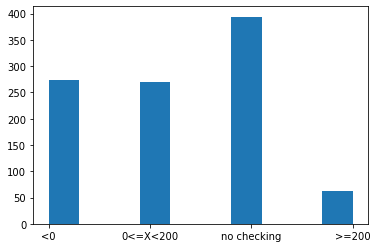

In [10]:
# varible checking_status
plt.hist(base.checking_status)
plt.show()

In [11]:
#Affichage des modalités
base.checking_status.value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

Ce graphique présente la répartition de la variable (checking_status) qui représente le solde du compte courant du demandeur de l'emprunt, nous pouvons voir grace au graphique ci-dessus que la modalité (no cheching) est la modalité la plus fréquente avec une valeur de 394 clients(39,4%), suivie de la modalité (X< 0 ) avec un pourcentage de 27% et la modalité (0<=X<200)  avec un pourcentage de 26,9%,  enfin on trouve la modalité (X> 200) avec une valeur de 63 clients (6,3%). 


#### 3 - 2 - 2 - Variable duration                


<AxesSubplot:xlabel='duration'>

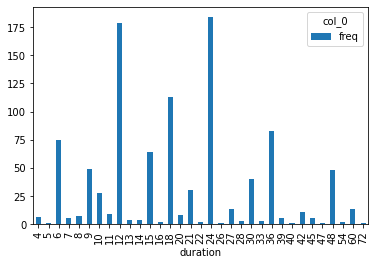

In [12]:
# varible duration
t = pd.crosstab(base.duration, "freq")
t.plot.bar()


le graphique ci-dessus représente l'échéance du crédit en cas de validation de dossier qui est représentée en mois, nous pouvons remarquer que la plupart des clients demandent une durée d'une année et/ou deux années avec une proportion de 37%.


#### 3 - 2 - 3 - Variable credit_history          

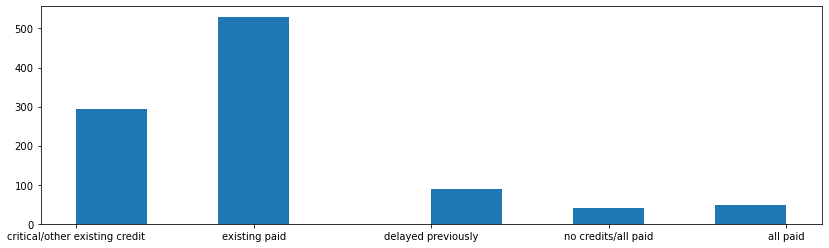

existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64

In [13]:
# variable credit_history   
plt.figure(figsize=(14,4))
plt.hist(base.credit_history)
plt.show()
base.credit_history.value_counts()

ce graphique illustre la répartition de l'historique des anciens crédits, parmi l'ensemble des clients dans notre jeu de données(1000 clients) nous trouvons que plus de la moitié 53% (530 clients) ont un crédit en cours de paiement, puis on trouve les demandeurs qui ont un crédit existant dans un état critique avec une proportion de 29.3% (293 cliets), par contre toutes les autres modalités (delayed previously, all paid, no credits/all paid) présentent un pourcentage inférieur à 8.8 %. 

#### 3 - 2 - 4 - variable purpose


<AxesSubplot:xlabel='purpose'>

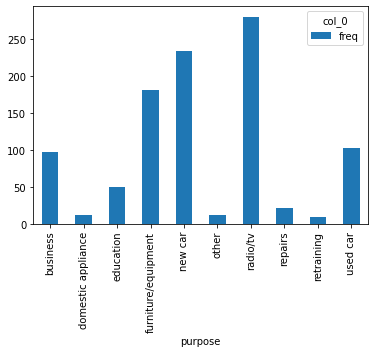

In [14]:
# variable purpose   

t = pd.crosstab(base.purpose, "freq")
t.plot.bar()

In [15]:
base.purpose.value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64

Maintenant nous allons s’intéresser à la variable purpose qui nous donne une idée sur la raison du crédit, nous pouvons constater que la raison (radio/tv) est le plus fréquent avec un pourcentage de 28% (280), après nous trouvons la raison 'new car' 23.4% (234), ensuite on observe les modalités (furniture/equipment, used car, business) qui ont une proportion comprise entre  18.1% et 9.7%, alors que les autres modalités (education, repairs, domestic appliance, other, retraining) présentent une prportion inférieur à 5%. 




#### 3 - 2 - 5 - Variable credit_amount

In [16]:
base.credit_amount.describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: credit_amount, dtype: float64

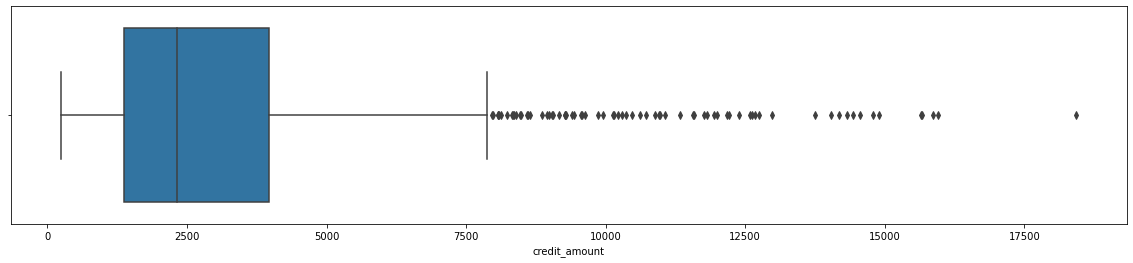

In [17]:
plt.figure(figsize=(20,4))
sns.boxplot(x="credit_amount", data=base)
plt.show()

la variable credit_amount présente une moyenne de 3271.25€ et un écart type de 2822.73
Le graphique en boîte de Tukey ci-dessus nous révèle que pour 50% des clients,
la valeur de crédit est comprise entre 2300€ et 18500€.

Les valeurs de crédit de la plupart des clients sont situées entre 250 et 3972 €, mais la
valeur de crédit de certains clients peut baisser jusqu'à 250 € ou atteindre 8000€ avec des
données aberrantes.

#### 3 - 2 - 6 - variable savings_status          

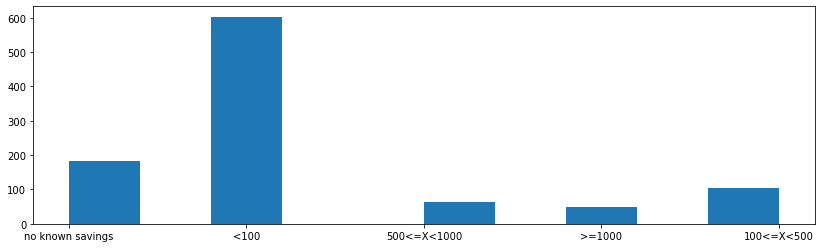

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

In [18]:
# variable varible savings_status   

plt.figure(figsize=(14,4))
plt.hist(base.savings_status)
plt.show()
base.savings_status.value_counts()

le graphique présente la répartition de la variable Statut du compte d'épargne (savings_status), la majorité des clients ont un compte d'épargne avec une somme inférieure à 100 € (60.3% :603), ensuite on trouve la classe (no known savings) qui représente 18.3% (183 clients), par contre toutes les autres modalités ('entre 100 et 500','entre 500 et 1000 €', 'supérieur à 1000€') ont un pourcentage inférieur à 10%.


#### 3 - 2 - 7 - variable employment

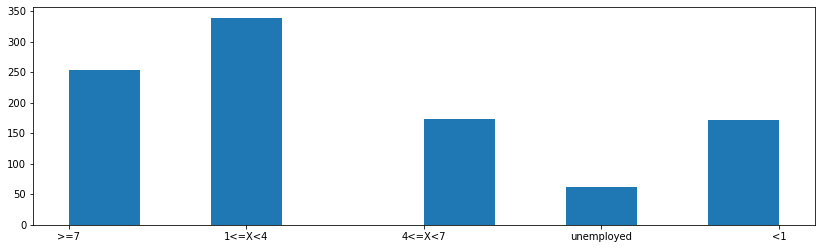

1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: employment, dtype: int64

In [19]:
# variable employment
plt.figure(figsize=(14,4))
plt.hist(base.employment)
plt.show()
base.employment.value_counts()


Cet histogramme nous montre les classes de la variable employment qui explique la stabilité du travail du client, nous pouvons constater que la modalité 'entre 1 et 4 années' est la plus fréquente 33.9%(339), de même on trouve la modalité 'supérieure ou égale à 7 ans' avec un pourcentage de 25.3% (253), Par la suite on observe les deux modalités ('entre 4 et 7 années', 'inférieur à un an') qui ont une proportion de 17.5%, alors que le reste des demandeurs ne travaillent pas (6.2%).


#### 3 - 2 - 8 - variable personal_status

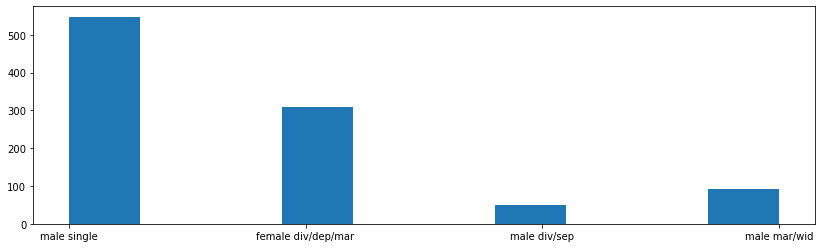

male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: personal_status, dtype: int64

In [20]:
# variable personal_status
plt.figure(figsize=(14,4))
plt.hist(base.personal_status)
plt.show()
base.personal_status.value_counts()

la majorité des clients sont soit des hommes célibataires ou des femmes divorcées, séparées ou mariées.

#### 3 - 2 - 8 - variable à expliquer Class

In [21]:
#changement du nom de la varibale class 
base.rename(columns={'class': 'v_class'}, inplace=True)

In [22]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

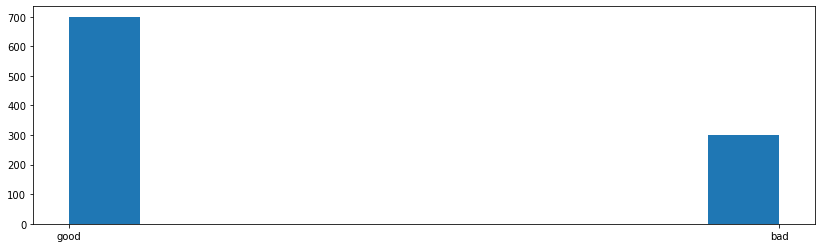

good    700
bad     300
Name: v_class, dtype: int64

In [23]:
# variable class
plt.figure(figsize=(14,4))
plt.hist(base.v_class)
plt.show()
base.v_class.value_counts()

### 3 - 3 - Analyse Bivariée

#### 3 - 3 - 1 - Croisement de la variable age avec le credit amount

Text(0, 0.5, 'creditAmount')

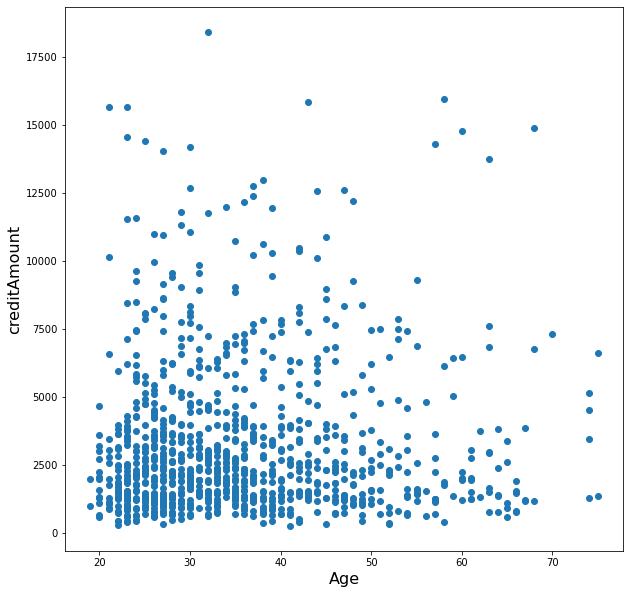

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(base.age,base.credit_amount)
plt.xlabel("Age", size = 16,)
plt.ylabel("creditAmount", size = 16)

on peut voir dans ce nuage de points que plus l'âge et le montant de crédit augmente plus la dispersion des points augmentent, et à l'inverse plus l'âge et le montant de crédit baissent plus la dispersion baisse, ça prend la forme d'un entonnoir.

#### 3 - 3 - 2 - Etude de corrélation entre nos variables quantitatives

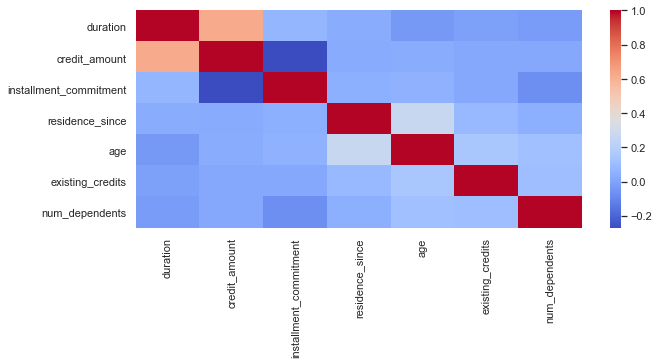

In [25]:
#Corrélation
sns.set(rc={'figure.figsize':(10,4)})

base_corr = base.corr()

ax = sns.heatmap(base_corr, xticklabels = base_corr.columns , 
                 yticklabels = base_corr.columns, cmap = 'coolwarm')

On peut constater une forte corrélation positive entre la durée et le montant du crédit plus le montant du crédit est élevé plus la durée est élevée.
On peut aussi voir une faible corrélation négative  entre le Taux de versement en pourcentage du revenu disponible et le montant du crédit.

#### 3 - 3 - 3 - Boite à Tukey  AGE/CLASS

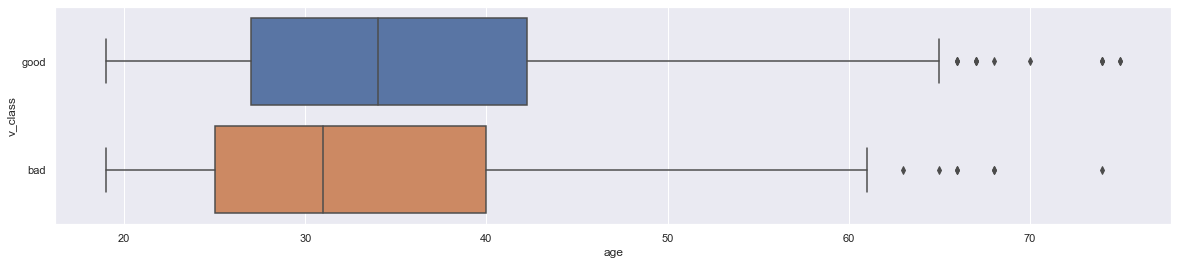

In [26]:
#Boite à moustache  AGE/CLASS

plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="age", y="v_class", data=base)

Ce graphique nous montre que la moyenne d'âge des bons profils est supérieure à celle des Mauvais profils, les bons profils ont un âge qui va de 27 ans à 45 ans alors que pour les mauvais profils cela varie entre 25 et 40 ans.
on verra par la suite si cette variable est discriminante pour l'accord des crédits


#### 3 - 3 - 4 - Boite à Tukey  CreditAmount/CLASS


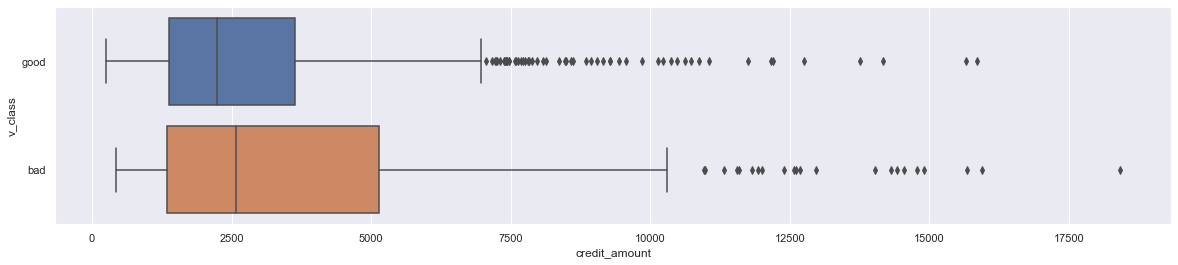

In [27]:
#Boite à moustache  CreditAmount/CLASS

plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="credit_amount", y="v_class", data=base)

Ce graphique nous montre que les bons profils se caractérisent par un montant de crédit qui est compris entre 1750 et 3750.
Les mauvais profils quant à eux sont caractérisés par un montant de crédit qui varie entre 1750 et 5000. 
On peut donc dire que lorsque le montant de crédit joue un rôle sur la classification du type de client.

#### 3 - 3 - 5 - croisement du type de profil en fonction de la raison d'emprunt

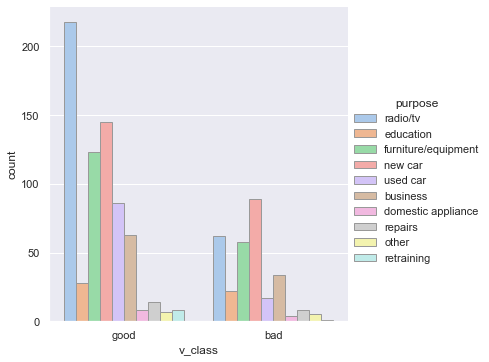

In [28]:
#croisement du type de profil en fonction de la raison d'emprunt
sns.catplot(x="v_class", hue="purpose", kind="count",
            palette="pastel", edgecolor=".6",
            data=base)

Dans ce graphique on peut voir que la raison d'emprunt des bons profils et des mauvais est souvent pour des achats de fournitures  ou d'ammeublement  suivi d'achat de voiture. 

#### 3 - 3 - 6 - croisement du type de profil en fonction de l'historique du crédit

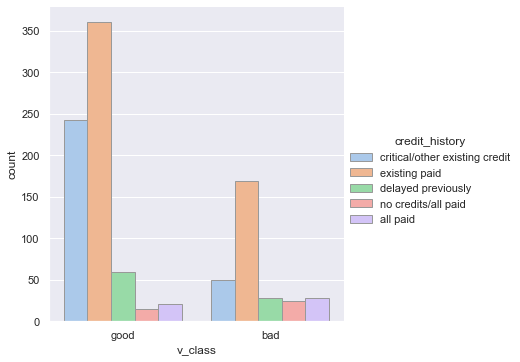

In [29]:
#croisement du type de profil en fonction de la raison d'emprunt
sns.catplot(x="v_class", hue="credit_history", kind="count",
            palette="pastel", edgecolor=".6",
            data=base)

Généralement les bons profils ont déja des crédits existant en cours de paye avec + de 350 profils , ou avec des situations critique pour des crédits existants avec 250 profils. 
Les mauvais profils ont généralement un crédit existant en cours de paye avec + de 150 profils, ou avec de situation critique pour des crédits existants avec 50 profils.


## 4 - Transformations

Dans cette partie nous allons recoder nos variables, elle va nous permettre d'entamer notre modélisation.


In [30]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

#### 4 - 1 duration

Création de 4 modalités à partir de la variable duration 
mod1 : <= 1 année
mod2 : > 1 année
mod3 : > 2 années 
mod4 : > 3 années 

In [31]:
regles = [
    (base.duration <= 12),
    (base.duration > 12) & (base.duration <= 24),
    (base.duration > 24) & (base.duration <= 36),
    (base.duration > 36)
    ]
# créer la liste des valeures pour ces conditions
valeurs = ['D_inf_12_mois', 'D_entre_12_24', 'D_entre_24_36','D_sup_36']

#attribuer les valeurs aux conditions
base.duration = np.select(regles, valeurs)

# Vérification
base.duration.value_counts()

D_entre_12_24    411
D_inf_12_mois    359
D_entre_24_36    143
D_sup_36          87
Name: duration, dtype: int64

#### 4 - 2 credit_amount

partitionnement de la variable credit_amount sen 4 classe avec une intervalle de 1300 basé sur le 1ér écart-type.

In [32]:
regles = [
    (base.credit_amount <= 1300),
    (base.credit_amount > 1300) & (base.credit_amount <= 2600),
    (base.credit_amount > 2600) & (base.credit_amount <= 3900),
    (base.credit_amount > 3900)
    ]
# créer la liste des valeures pour ces conditions
valeurs = ['CrA_inf_1300', 'CrA_entre_1300_2600', 'CrA_entre_2600_3900','CrA_sup_3900']

#attribuer les valeurs aux conditions
base.credit_amount = np.select(regles, valeurs)

# Vérification
base.credit_amount.value_counts()

CrA_entre_1300_2600    331
CrA_sup_3900           262
CrA_inf_1300           223
CrA_entre_2600_3900    184
Name: credit_amount, dtype: int64

#### 4 - 3 installment_commitment

recodage des modalités pour le traitement futur


In [33]:
# Transformation
regles = [
    (base.installment_commitment == 1),
    (base.installment_commitment == 2),
    (base.installment_commitment == 3),
    (base.installment_commitment == 4)
    ]

# créer la liste des valeures pour ces conditions
valeurs = ['I_C_1%', 'I_C_2%', 'I_C_3%','I_C_4%']

#attribuer les valeurs aux conditions
base.installment_commitment = np.select(regles, valeurs)

# Vérification du processus
base.installment_commitment.value_counts()


I_C_4%    476
I_C_2%    231
I_C_3%    157
I_C_1%    136
Name: installment_commitment, dtype: int64

#### 4 - 4 residence_since


In [34]:
# Transformation
regles = [
    (base.residence_since == 1),
    (base.residence_since == 2),
    (base.residence_since == 3),
    (base.residence_since == 4)
    ]

# créer la liste des valeures pour ces conditions
valeurs = ['R_S_1anné', 'R_S_2annés', 'R_S_3annés','R_S_4annés']

#attribuer les valeurs aux conditions
base.residence_since = np.select(regles, valeurs)

# Vérification du processus

base.residence_since.value_counts()

R_S_4annés    413
R_S_2annés    308
R_S_3annés    149
R_S_1anné     130
Name: residence_since, dtype: int64

#### 4 - 5 âge


répartition des classes d'âges par tranche de 10 ans

In [35]:
regles = [
    (base.age >= 19) & (base.age <= 29),
    (base.age > 29) & (base.age <= 39),
    (base.age > 39) & (base.age <= 49),
    (base.age > 49)
    ]
# créer la liste des valeures pour ces conditions
valeurs = ['Ag_entre_19_29', 'Ag_entre_29_39', 'Ag_entre_39_49','Ag_sup_49']

#attribuer les valeurs aux conditions
base.age = np.select(regles, valeurs)

# Vérification
base.age.value_counts()

Ag_entre_19_29    371
Ag_entre_29_39    330
Ag_entre_39_49    174
Ag_sup_49         125
Name: age, dtype: int64

#### 4 - 5 existing_credits

 

création de 3 classe d'existing crédit avec le regroupement des deux dernières à cause de leur faible effectif

In [36]:
regles = [
    (base.existing_credits == 1),
    (base.existing_credits == 2),
    (base.existing_credits == 3) | (base.existing_credits == 4)
    ]

# créer la liste des valeures pour ces conditions
valeurs = ['Ex_C_1', 'Ex_C_2', 'Ex_C_3_4']

#attribuer les valeurs aux conditions
base.existing_credits = np.select(regles, valeurs)

# Vérification du processus
base.existing_credits.value_counts()

Ex_C_1      633
Ex_C_2      333
Ex_C_3_4     34
Name: existing_credits, dtype: int64

#### 4 - 6 num_dependents



recodage des modalités de la variable num_dependents


In [37]:
# Transformation
regles = [
    (base.num_dependents == 1),
    (base.num_dependents == 2)
    ]

# créer la liste des valeures pour ces conditions
valeurs = ['Num_D_unePersonne', 'Num_D_deuxPersonnes']

#attribuer les valeurs aux conditions
base.num_dependents = np.select(regles, valeurs)

# Vérification du processus

base.num_dependents.value_counts()

Num_D_unePersonne      845
Num_D_deuxPersonnes    155
Name: num_dependents, dtype: int64

## 5 - Modélisation 


Dans cette partie nous allons modéliser un bon ou un mauvais client, pour ce faire nous allons se baser sur la classification binaire en méthode supervisée. On va donc commencer par spliter notre échantillon en deux jeux de donnée Train/Test ensuite nous allons faire appel à 4 modèles (reg log, SVM, RF, reseau de neurones). La dernierre partie consistera à tester les performances de nos modèles avant de proposé celui qu'on va mettre en place pour notre client Chaabi Bank.
       




In [38]:
# variable cible
Target = base.v_class
base.drop(columns = ['v_class'], inplace=True)

# Transformation des variablesexplicatives en binaires
BS = pd.DataFrame(pd.get_dummies(base))

#Affichage
BS.columns
BS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 79 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   checking_status_0<=X<200                       1000 non-null   uint8
 1   checking_status_<0                             1000 non-null   uint8
 2   checking_status_>=200                          1000 non-null   uint8
 3   checking_status_no checking                    1000 non-null   uint8
 4   duration_D_entre_12_24                         1000 non-null   uint8
 5   duration_D_entre_24_36                         1000 non-null   uint8
 6   duration_D_inf_12_mois                         1000 non-null   uint8
 7   duration_D_sup_36                              1000 non-null   uint8
 8   credit_history_all paid                        1000 non-null   uint8
 9   credit_history_critical/other existing credit  1000 non-null   uint8
 10  c


Split en test/train



In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(BS,
                                                    Target,
                                                    stratify = Target,
                                                    test_size = 0.2,
                                                    random_state = 0)


### 5 - 1 - Régression logistique



La régression logistique est un algorithme supervisé  de classification populaire en Machine Learning. Il est souvent utilisé lorsqu'on cherche à mettre une étiquette ou un label sur une observation et c'est bien notre cas.
on va commencer par tester les parametres afin d'en tirer le meilleur modèle.


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [41]:
# régression logistique
Lg = LogisticRegression(max_iter = 10000)
Lg.fit(X_train, y_train)

print("score apprentissage : ", Lg.score(X_train, y_train))
print("score test : ",Lg.score(X_test, y_test))

score apprentissage :  0.78875
score test :  0.805


In [42]:
#Sans régularisation
logregSansReg = LogisticRegression(penalty='none', max_iter=10000, random_state=0)
logregSansReg.fit(X_train, y_train)
print("Sans régularisation, score apprentissage : ", logregSansReg.score(X_train, y_train))
print("Sans régularisation, score test : ",logregSansReg.score(X_test, y_test))

Sans régularisation, score apprentissage :  0.7875
Sans régularisation, score test :  0.77


In [43]:
# C =0.001
logregC0001 = LogisticRegression(C=0.001, max_iter=10000)
logregC0001.fit(X_train, y_train)
print("C = 0,001 , score apprentissage : ", 
      logregC0001.score(X_train, y_train))
print("C = 0,001 , score test : ", 
      logregC0001.score(X_test, y_test))

C = 0,001 , score apprentissage :  0.7
C = 0,001 , score test :  0.7


In [44]:
# C =1
logregC1 = LogisticRegression(C=1, max_iter=10000)
logregC1.fit(X_train, y_train)
print("C = 1, score apprentissage : ", 
      logregC1.score(X_train, y_train))
print("C = 1, score test : ", 
      logregC1.score(X_test, y_test))

C = 1, score apprentissage :  0.78875
C = 1, score test :  0.805


In [45]:
# C =100
logregC100 = LogisticRegression(C=100, max_iter=10000)
logregC100.fit(X_train, y_train)
print("C = 100, score apprentissage : ", 
      logregC100.score(X_train, y_train))
print("C = 100, score test : ", 
      logregC100.score(X_test, y_test))

C = 100, score apprentissage :  0.7875
C = 100, score test :  0.775


In [46]:
# avec regularisation pour  C= 0.001, 1, 50, 100, 200, 500 et penalty= l1 , l2
rf = LogisticRegression(solver = 'liblinear', max_iter=10000)

grid = {'penalty': ['l1','l2'],
        'C': [0.001,1,50,100,200,500]
        } 

clf = GridSearchCV(rf , grid)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))




0.7875
0.775


In [47]:
clf.best_params_

{'C': 200, 'penalty': 'l2'}

In [48]:
clf.cv_results_

{'mean_fit_time': array([0.0113975 , 0.01039701, 0.01959658, 0.01499734, 0.08138752,
        0.01919818, 0.09276228, 0.02679772, 0.1246696 , 0.02239618,
        0.08518639, 0.02579522]),
 'std_fit_time': array([0.00185315, 0.00079862, 0.00344129, 0.00328327, 0.02874676,
        0.00231314, 0.01657262, 0.00868344, 0.03489869, 0.00332273,
        0.01328535, 0.00563493]),
 'mean_score_time': array([0.00579939, 0.00539927, 0.00980272, 0.00678124, 0.00579863,
        0.00680594, 0.00540009, 0.01439743, 0.00439987, 0.00959883,
        0.00739965, 0.00940003]),
 'std_score_time': array([0.00097803, 0.00080154, 0.0052665 , 0.00268013, 0.00146965,
        0.00214792, 0.00205856, 0.01317859, 0.00135533, 0.00402904,
        0.00307238, 0.00492349]),
 'param_C': masked_array(data=[0.001, 0.001, 1, 1, 50, 50, 100, 100, 200, 200, 500,
                    500],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_va

------------


.

Après la comparaison des différents paramètres, nous allons garder le modèle suivant qui a obtenu la meilleur performance.


In [49]:
from sklearn import metrics

Lg_best = LogisticRegression(solver = 'liblinear', max_iter=10000, C=200, penalty= 'l2')
Lg_best.fit(X_train, y_train)
y_pred_train = Lg_best.predict(X_train)
y_pred_test = Lg_best.predict(X_test)

print(metrics.classification_report(y_test, y_pred_test))
print(metrics.confusion_matrix(y_test, y_pred_test))


              precision    recall  f1-score   support

         bad       0.68      0.47      0.55        60
        good       0.80      0.91      0.85       140

    accuracy                           0.78       200
   macro avg       0.74      0.69      0.70       200
weighted avg       0.76      0.78      0.76       200

[[ 28  32]
 [ 13 127]]


In [50]:
from sklearn.metrics import confusion_matrix

mc = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', mc)

print('\nTrue Positives(TP) = ', mc[0,0])

print('\nTrue Negatives(TN) = ', mc[1,1])

print('\nFalse Positives(FP) = ', mc[0,1])

print('\nFalse Negatives(FN) = ', mc[1,0])
print("\n")
#print accuracy of model
#Accuracy: Percentage of correct predictions
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_test))

#print precision value of model
#Precision: Correct positive predictions relative to total positive predictions
print("Precision",metrics.precision_score(y_test, y_pred_test,pos_label='good'))

#print recall value of model
#Recall: Correct positive predictions relative to total actual positives
print("Recall", metrics.recall_score(y_test, y_pred_test,pos_label='good'))


Confusion matrix

 [[ 28  32]
 [ 13 127]]

True Positives(TP) =  28

True Negatives(TN) =  127

False Positives(FP) =  32

False Negatives(FN) =  13


Accuracy :  0.775
Precision 0.7987421383647799
Recall 0.9071428571428571


<AxesSubplot:>

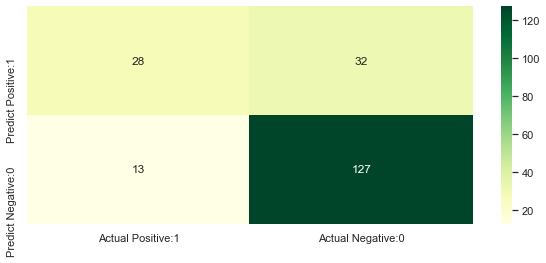

In [51]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=mc, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

Courbe de Roc

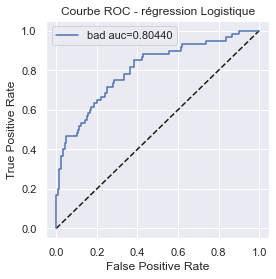

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve, auc
probas = Lg_best.predict_proba(X_test)
fpr0, tpr0, thresholds0 = roc_curve(y_test, probas[:, 0], pos_label=Lg_best.classes_[0], drop_intermediate=False)
fpr0.shape

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)  
ax.plot(fpr0, tpr0, label=Lg_best.classes_[0] + ' auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - régression Logistique')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate");
ax.legend();


La courbe ROC (Receiver Operating Characteristic) représente la sensibilité en fonction de 1 – spécificité pour toutes les valeurs seuils possibles du marqueur étudié. La sensibilité est la capacité du test à bien détecter les bons dossiers clients et la spécificité est la capacité du test à bien détecter les mauvais dossiers clients.
Comme on peut le voir ci-dessus dans notre courbe de ROC, l'AUC est égal à 0.804. Celui-ci, 
mesure la qualité des prédictions du modèle plus il se rapproche de 1 plus notre modèle est bon.

### 5 - 2 - Support vector machine (SVM)


 Nous cherchons à détecter plus finements les frontières entre nos deux classes (bon/mauvais) de dossier, le modèle SVM répond parfaitement à ce besoin et grâce à son algorithme,les données sont séparées en plusieurs classes en recourant à la "marge maximale", avec une frontière de séparation choisie pour maximiser la distance entre les groupes de données.
 
 

In [53]:
from sklearn.svm import SVC
clf = SVC()

grid = {'kernel': ['rbf','poly'],
        'gamma': ['scale','auto']
        } 

clf = GridSearchCV(clf , grid)
clf.fit(X_train, y_train)
print("score apprentissage : ", clf.score(X_train, y_train))
print("score test : ", clf.score(X_test, y_test))



score apprentissage :  0.8675
score test :  0.795


In [54]:
#Cela donnera la combinaison d’hyperparamètres avec des valeurs qui donnent la meilleure performance de notre estimation spécifiée
clf.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [55]:
clf.cv_results_

{'mean_fit_time': array([0.05558934, 0.04539022, 0.03839197, 0.0363945 ]),
 'std_fit_time': array([0.0074677 , 0.00808833, 0.00184848, 0.00332278]),
 'mean_score_time': array([0.02859735, 0.01020055, 0.01779833, 0.00999837]),
 'std_score_time': array([0.00958256, 0.00117154, 0.00116894, 0.00252949]),
 'param_gamma': masked_array(data=['scale', 'scale', 'auto', 'auto'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'poly', 'rbf', 'poly'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 'scale', 'kernel': 'rbf'},
  {'gamma': 'scale', 'kernel': 'poly'},
  {'gamma': 'auto', 'kernel': 'rbf'},
  {'gamma': 'auto', 'kernel': 'poly'}],
 'split0_test_score': array([0.7375 , 0.725  , 0.71875, 0.7    ]),
 'split1_test_score': array([0.71875, 0.725  , 0.7125 , 0.7    ]),
 'split2_test_score': array([0.75   , 0.74375, 0.7125 , 0.

la comparaison des différents paramètres nous permet donc de chosir nos meilleurs paramètres ('scale' et 'rbf') 

In [56]:

Lg_best_SVM = SVC(kernel='rbf', gamma='scale',probability=True)
Lg_best_SVM.fit(X_train, y_train)
y_pred_train = Lg_best_SVM.predict(X_train)
y_pred_test = Lg_best_SVM.predict(X_test)

print(metrics.classification_report(y_test, y_pred_test))
print(metrics.confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

         bad       0.83      0.40      0.54        60
        good       0.79      0.96      0.87       140

    accuracy                           0.80       200
   macro avg       0.81      0.68      0.70       200
weighted avg       0.80      0.80      0.77       200

[[ 24  36]
 [  5 135]]


In [57]:
mc_SVM = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', mc_SVM)

print('\nTrue Positives(TP) = ', mc_SVM[0,0])

print('\nTrue Negatives(TN) = ', mc_SVM[1,1])

print('\nFalse Positives(FP) = ', mc_SVM[0,1])

print('\nFalse Negatives(FN) = ', mc_SVM[1,0])
print("\n")
#print accuracy of model
#Accuracy: Percentage of correct predictions
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_test))

#print precision value of model
#Precision: Correct positive predictions relative to total positive predictions
print("Precision",metrics.precision_score(y_test, y_pred_test,pos_label='good'))

#print recall value of model
#Recall: Correct positive predictions relative to total actual positives
print("Recall", metrics.recall_score(y_test, y_pred_test,pos_label='good'))

Confusion matrix

 [[ 24  36]
 [  5 135]]

True Positives(TP) =  24

True Negatives(TN) =  135

False Positives(FP) =  36

False Negatives(FN) =  5


Accuracy :  0.795
Precision 0.7894736842105263
Recall 0.9642857142857143


<AxesSubplot:>

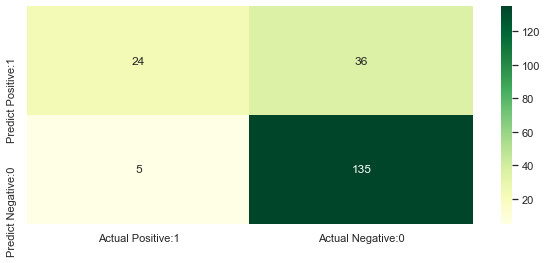

In [58]:
cm_matrix = pd.DataFrame(data=mc_SVM, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

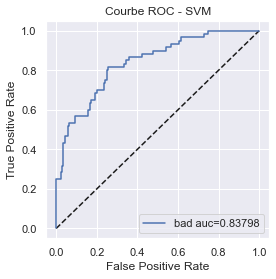

In [59]:
probas = Lg_best_SVM.predict_proba(X_test)
fpr0, tpr0, thresholds0 = roc_curve(y_test, probas[:, 0], pos_label=Lg_best_SVM.classes_[0], drop_intermediate=False)
fpr0.shape

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)  
ax.plot(fpr0, tpr0, label=Lg_best_SVM.classes_[0] + ' auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - SVM')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate");
ax.legend();

Pour notre modèle SVM l'AUC est égal à 0.84. 

### 5 - 3 - Random forest (Forêt aléatoire)




L'algorithme Random Forest est un algorithme qui est utilisé pour prédire et analyser les données. Il est utilisé à la fois pour la régression et pour la classification. Il fusionne plusieurs arbres de décision pour créer une forêt qui conduit à des résultats de classification. Il est extrêmement simple et très flexible comme modèle d'apprentissage automatique.


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = RandomForestClassifier(random_state=0)

grid = {'n_estimators': [10,50,100],
       'criterion': ['gini', 'entropy'],
       'max_features' : [1,2,3] } 

clf = GridSearchCV(clf , grid)
clf.fit(X_train, y_train)

print("score apprentissage : ", clf.score(X_train, y_train))
print("score test : ", clf.score(X_test, y_test))


score apprentissage :  1.0
score test :  0.735


In [62]:
clf.best_params_

{'criterion': 'gini', 'max_features': 3, 'n_estimators': 50}

In [63]:
clf.cv_results_

{'mean_fit_time': array([0.04679265, 0.1339839 , 0.31155124, 0.02639213, 0.22296395,
        0.47947001, 0.0549911 , 0.18537021, 0.24657707, 0.03039055,
        0.11257515, 0.22016859, 0.02539186, 0.11718941, 0.22955527,
        0.02978277, 0.11818614, 0.22915721]),
 'std_fit_time': array([0.01299759, 0.02674618, 0.07138499, 0.00101187, 0.11801832,
        0.0907454 , 0.01184748, 0.01307445, 0.01988922, 0.00787462,
        0.00349619, 0.00783318, 0.0004851 , 0.00852215, 0.00588199,
        0.00213794, 0.00613576, 0.00722254]),
 'mean_score_time': array([0.00819902, 0.01479349, 0.02539139, 0.00499907, 0.02220125,
        0.03859415, 0.00899839, 0.01559815, 0.01858873, 0.00519996,
        0.01280584, 0.02099338, 0.00480342, 0.01299777, 0.01900282,
        0.00521154, 0.0109849 , 0.01859508]),
 'std_score_time': array([0.00354325, 0.00445199, 0.00622079, 0.00062624, 0.00879009,
        0.0081139 , 0.00219104, 0.00233172, 0.00078968, 0.00040017,
        0.00272192, 0.00380315, 0.0004019 , 

Notre modèle aura l'indice de gini comme mesure d'impureté et constitue son noeud en se basant sur 3 variables avec 50 arbres de décision dans notre Random_forest

In [64]:
Lg_best_R_Forest = RandomForestClassifier(random_state=0, criterion='gini', max_features=3, n_estimators=50)
Lg_best_R_Forest.fit(X_train, y_train)
y_pred_train = Lg_best_R_Forest.predict(X_train)
y_pred_test = Lg_best_R_Forest.predict(X_test)

print(metrics.classification_report(y_test, y_pred_test))
print(metrics.confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

         bad       0.63      0.28      0.39        60
        good       0.75      0.93      0.83       140

    accuracy                           0.73       200
   macro avg       0.69      0.61      0.61       200
weighted avg       0.71      0.73      0.70       200

[[ 17  43]
 [ 10 130]]


In [65]:
mc_R_Forest = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', mc_R_Forest)

print('\nTrue Positives(TP) = ', mc_R_Forest[0,0])

print('\nTrue Negatives(TN) = ', mc_R_Forest[1,1])

print('\nFalse Positives(FP) = ', mc_R_Forest[0,1])

print('\nFalse Negatives(FN) = ', mc_R_Forest[1,0])
print("\n")
#print accuracy of model
#Accuracy: Percentage of correct predictions
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_test))

#print precision value of model
#Precision: Correct positive predictions relative to total positive predictions
print("Precision",metrics.precision_score(y_test, y_pred_test,pos_label='good'))

#print recall value of model
#Recall: Correct positive predictions relative to total actual positives
print("Recall", metrics.recall_score(y_test, y_pred_test,pos_label='good'))

Confusion matrix

 [[ 17  43]
 [ 10 130]]

True Positives(TP) =  17

True Negatives(TN) =  130

False Positives(FP) =  43

False Negatives(FN) =  10


Accuracy :  0.735
Precision 0.7514450867052023
Recall 0.9285714285714286


<AxesSubplot:>

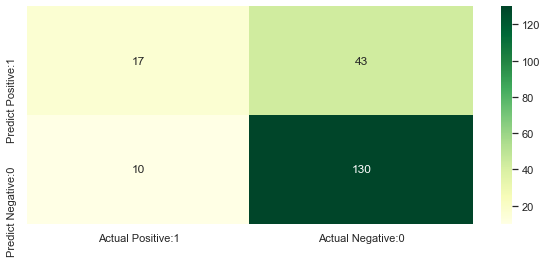

In [66]:
cm_matrix = pd.DataFrame(data=mc_R_Forest, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

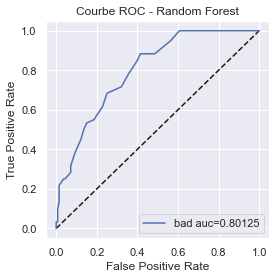

In [67]:
probas = Lg_best_R_Forest.predict_proba(X_test)
fpr0, tpr0, thresholds0 = roc_curve(y_test, probas[:, 0], pos_label=Lg_best_R_Forest.classes_[0], drop_intermediate=False)
fpr0.shape

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)  
ax.plot(fpr0, tpr0, label=Lg_best_R_Forest.classes_[0] + ' auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - Random Forest')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate");
ax.legend();

Pour notre Random forest la courbe de roc qui nous permet de mesurer la performance de notre modèle atteint un AUC égal à 0.8 .


### 5 - 4 - Réseau de neurones


Les réseaux neuronaux excellent généralement dans les tâches de classification, qui nécessitent des ensembles de données étiquetés pour l’apprentissage supervisé.

Dans notre cas d'usage nous allons apprendre à notre modèle à classer deux types de clients (Bon/Mauvais) en se basant sur l'échantillon de train.




In [70]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=0)

grid = {'solver': ['sgd','adam'],
        'max_iter': [800,1000]
              }

clf = GridSearchCV(clf , grid)
clf.fit(X_train, y_train)

print("score apprentissage : ", clf.score(X_train, y_train))
print("score test : ", clf.score(X_test, y_test))

clf.best_params_

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

score apprentissage :  0.8075
score test :  0.8


{'max_iter': 1000, 'solver': 'sgd'}

Notre modèle aura comme algorithmes d'optimisation 'sgd' avec 1000 comme nombre d'itérations maximales

In [72]:
mlp_R_N = MLPClassifier(random_state=0,max_iter=1000, solver='sgd')
mlp_R_N.fit(X_train, y_train)

y_pred_train = mlp_R_N.predict(X_train)
y_pred_test = mlp_R_N.predict(X_test)

print(metrics.classification_report(y_test, y_pred_test))
print(metrics.confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

         bad       0.76      0.48      0.59        60
        good       0.81      0.94      0.87       140

    accuracy                           0.80       200
   macro avg       0.79      0.71      0.73       200
weighted avg       0.79      0.80      0.78       200

[[ 29  31]
 [  9 131]]


In [73]:
mc_R_N = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', mc_R_N)

print('\nTrue Positives(TP) = ', mc_R_N[0,0])

print('\nTrue Negatives(TN) = ', mc_R_N[1,1])

print('\nFalse Positives(FP) = ', mc_R_N[0,1])

print('\nFalse Negatives(FN) = ', mc_R_N[1,0])
print("\n")
#print accuracy of model
#Accuracy: Percentage of correct predictions
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_test))

#print precision value of model
#Precision: Correct positive predictions relative to total positive predictions
print("Precision",metrics.precision_score(y_test, y_pred_test,pos_label='good'))

#print recall value of model
#Recall: Correct positive predictions relative to total actual positives
print("Recall", metrics.recall_score(y_test, y_pred_test,pos_label='good'))

Confusion matrix

 [[ 29  31]
 [  9 131]]

True Positives(TP) =  29

True Negatives(TN) =  131

False Positives(FP) =  31

False Negatives(FN) =  9


Accuracy :  0.8
Precision 0.808641975308642
Recall 0.9357142857142857


<AxesSubplot:>

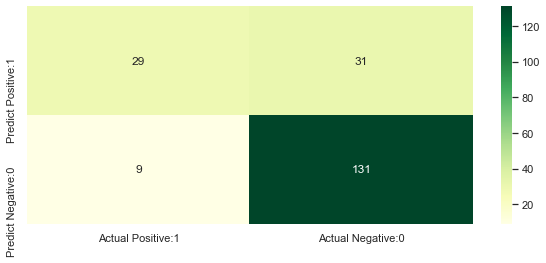

In [74]:
cm_matrix = pd.DataFrame(data=mc_R_N, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

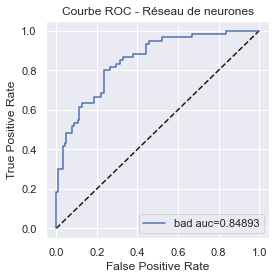

In [75]:
probas = mlp_R_N.predict_proba(X_test)
fpr0, tpr0, thresholds0 = roc_curve(y_test, probas[:, 0], pos_label=mlp_R_N.classes_[0], drop_intermediate=False)
fpr0.shape

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)  
ax.plot(fpr0, tpr0, label=mlp_R_N.classes_[0] + ' auc=%1.5f' % aucf)
ax.set_title('Courbe ROC - Réseau de neurones')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate");
ax.legend();

Pour le réseau de neurones l'AUC est de 0.85

### 5 - 5 - Comparaison et choix du meilleur modèle


Après avoir paramétrer, modéliser et analyser les performances de chaque modèle. On va s'intéresser à l'analyse ainsi que la comparaison de ces performances. la régression logistique à atteint 77.5 de précision avec un AUC de 0.804, alors que le modèle SVM a réussi à prédire jusqu'à 79.5% des résultats et un AUC de 0.84, pour le random forest l'auc est de 0.801 et une précision de bonne prédiction de 73.5% ,et notre dernier modèle RN prend la tête du classement avec un pourcentage de précision qui est de 80% et un AUC égal à 0.85.


## 6 - Conclusion 

Nous avons eu comme demande de mettre en place un système de ML au sein du service crédit de Chaabi Bank, ce dernier va lui permettre de gérer les dossiers de demande de crédit et classer ces dossiers en deux catégories Bon ou Mauvais. Grâce à notre solution ML nous allons établir une solution qui se base sur le réseau de neurones qui est l'un des méthodes supervisés de classification , ce choix s'impose par les performances atteintes par notre modèle en se basant sur l'échantillon de donnée fourni par notre client.